## Constants

In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

V = 1750 #mL
T1 = 62.1 #deg F
T2 = 145.8 #deg F


In [3]:
#Important functions

def actuator_to_rotameter(opening):
    openings = [0,20,25,35,40]
    index =   openings.index(opening)
    rotameters = [0,18.5,35,60,72]
    return rotameters[index]

#RR to flowrate
def rotameter_to_flowrate(RR):
    return 90*RR

F2 = rotameter_to_flowrate(44) #Hot water flowrate
F2 = 44*90

## Find Value of Tau_s

5400


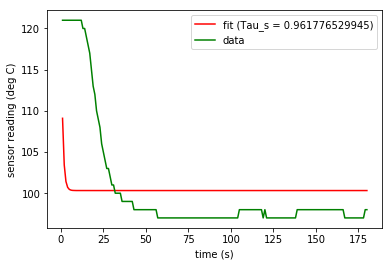

In [4]:
T0 = 121
TS0 = 121

#Find the value of F1
F1_actuator = actuator_to_rotameter(35)
F1 = rotameter_to_flowrate(F1_actuator) 
F1 = 60*90
print(F1)
#Define the temperature equation
def temperature(t, tau_s):
    alpha = (F1+F2)/V
    #print('beta = ' + str(beta))
    beta = (F1*T1+F2*T2)/V
    #print('alpha = ' + str(alpha))
    A = beta/alpha*tau_s
    #print('A = ' + str(A))
    B = (T0-beta/alpha)/(1/tau_s-alpha)
    #print('B = ' + str(B))
    C = TS0 - beta*tau_s/alpha -(T0-beta/alpha)/(1/tau_s-alpha)
    #print('C = ' + str(simplify(C)))
    T = A+B*np.exp(-alpha*t)+C*np.exp(-t/tau_s)
    return T

#Fit the temperature equation to the data to find tau_s
open_loop_data = pd.read_csv('open_loop_data.csv')
time = open_loop_data.Time
sensor_data = open_loop_data.sensor_data
popt, pcov = curve_fit(temperature, time, sensor_data)
text = 'fit (Tau_s = ' + str(popt[0]) + ')'
plt.plot(time, temperature(time, *popt), 'r-', label=text)
plt.plot(time, sensor_data, 'g-', label='data')
plt.xlabel('time (s)')
plt.ylabel('sensor reading (deg C)')
plt.legend()
plt.show()

In [ ]:
#Define the temperature equation
def temperature(t, tau_s):
    alpha = (F1+F2)/V
    #print('beta = ' + str(beta))
    beta = (F1*T1+F2*T2)/V
    #print('alpha = ' + str(alpha))
    A = beta/alpha*tau_s
    #print('A = ' + str(A))
    B = (T0-beta/alpha)/(1/tau_s-alpha)
    #print('B = ' + str(B))
    C = TS0 - beta*tau_s/alpha -(T0-beta/alpha)/(1/tau_s-alpha)
    #print('C = ' + str(simplify(C)))
    T = A+B*np.exp(-alpha*t)+C*np.exp(-t/tau_s)
    return T